     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 103.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.9 MB/s eta 0:00:00


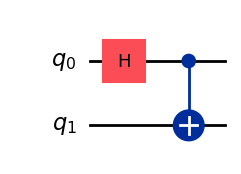

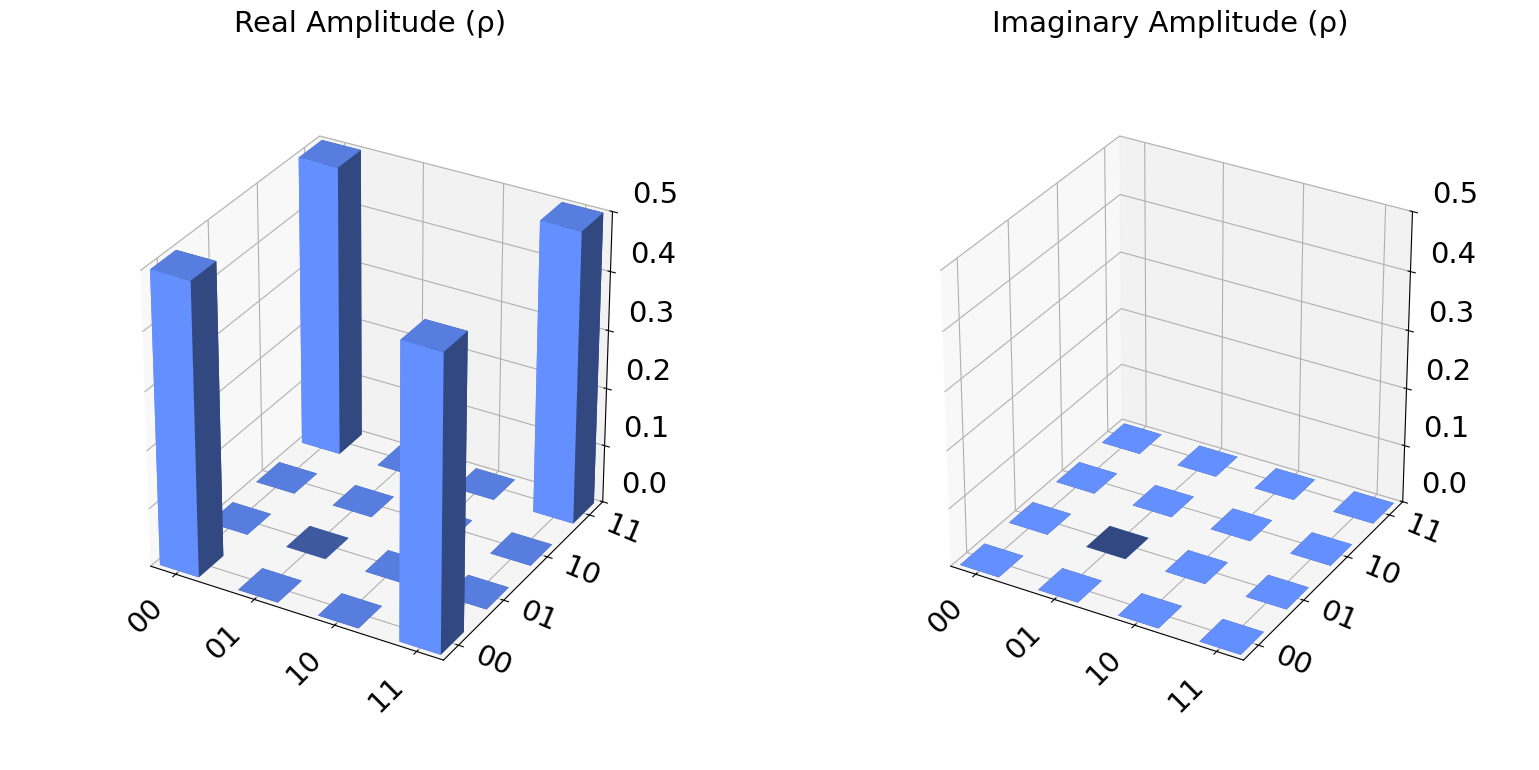

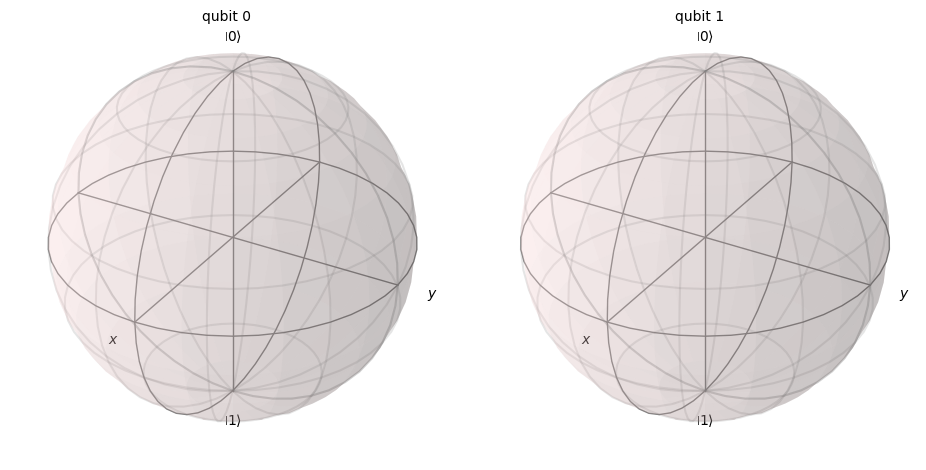

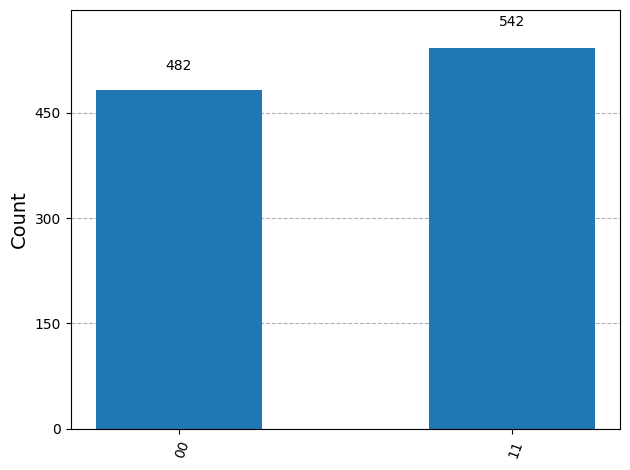

Final statevector:
 Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))

Measurement counts:
 {'00': 482, '11': 542}


In [1]:
# Step 1: Install everything cleanly
!pip install qiskit qiskit-aer pylatexenc matplotlib --quiet

# Step 2: Import libraries
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import (
    plot_bloch_multivector,
    plot_state_city,
    plot_histogram,
)
from IPython.display import display
import matplotlib.pyplot as plt

# Step 3: Create and display the 2-qubit circuit
qc = QuantumCircuit(2)
qc.h(0)          # Hadamard on the first qubit
qc.cx(0, 1)      # CNOT (first controls second)
display(qc.draw('mpl'))   # ✅ this now works fine

# Step 4: Obtain the statevector
state = Statevector.from_instruction(qc)

# Step 5: Show visualizations
display(plot_state_city(state))
display(plot_bloch_multivector(state))

# Step 6: Simulate measurements
sim = Aer.get_backend('aer_simulator')
qc.measure_all()
result = sim.run(qc, shots=1024).result()
counts = result.get_counts()

# Step 7: Plot results and show data
display(plot_histogram(counts))
plt.show()

print("Final statevector:\n", state)
print("\nMeasurement counts:\n", counts)
